# Azted G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [6]:
from aztec_gddt.experiment import test_run

sim_df = test_run()
sim_df.columns

Index(['index', 'l1_blocks_passed', 'delta_l1_blocks', 'agents',
       'validator_set', 'PROVING_COST_MODIFIER', 'current_epoch', 'last_epoch',
       'simulation', 'subset', 'run', 'timestep', 'label',
       'timestep_in_l1_blocks', 'general', 'fee', 'reward', 'stake', 'slash'],
      dtype='object')

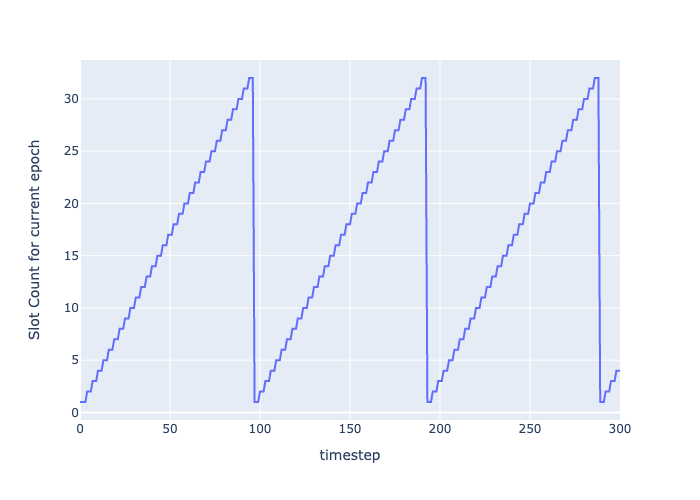

In [7]:
x= sim_df.timestep
y = sim_df.current_epoch.map(lambda x: len(x.slots))

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Slot Count for current epoch'})
fig.show()

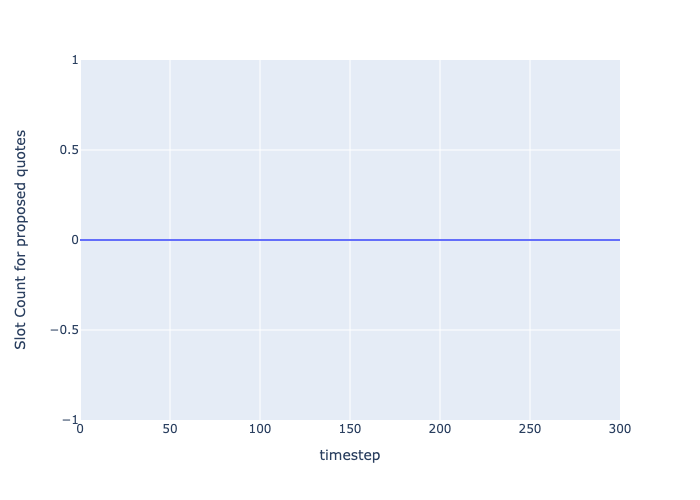

In [9]:
x= sim_df.timestep
y = sim_df.last_epoch.map(lambda x: len(x.prover_quotes))

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Slot Count for proposed quotes'})
fig.show()